# Supervised Machine Learning: feature selection
Feature selection is aimed at identifying and selecting the most relevant and informative features from a given dataset. With the abundance of available features, selecting the right subset of variables can significantly impact the model's performance. By pruning irrelevant or redundant features, feature selection not only enhances the accuracy and generalisation capabilities of models but also reduces computational complexity, ensuring faster and more efficient predictions.

---
## 1.&nbsp;Import libraries 💾

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import set_config
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel

In [52]:
original_housing_df = pd.read_csv('housing_iteration_6_regression.csv')
original_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
X = original_housing_df.copy()
y = X.pop('SalePrice')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [56]:
# Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")

X_train_cat = X_train.select_dtypes(exclude = 'number').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [57]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

In [58]:
# defining ordinal & onehot columns
ordinal_cols = ['Street','CentralAir','Foundation','ExterQual', 
                'ExterCond','BsmtQual','BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'ExterQual', 'ExterCond', 
                'KitchenQual','FireplaceQu', 'LotShape', 'LandContour',
                'Utilities','LotConfig', 'LandSlope', 'BldgType',
                'HouseStyle','RoofStyle','RoofMatl' , 
                'MasVnrType', 'HeatingQC', 'Electrical',
                #'PoolQC'
                'Functional', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive']
onehot_cols = ['Heating', 'MSZoning','Condition1',
               'Neighborhood', 'Exterior1st', 'GarageType','SaleType']

In [59]:
street_cats = ['N_A', 'Grvl', 'Pave']
central_air_cats = ['N_A', 'N', 'Y']
foundation_cats = ['N_A', 'Slab', 'BrkTil', 'CBlock', 'Wood', 'Stone', 'PConc']
BsmtQual_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtCond_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtExposure_cat = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
#BsmtFinType2_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ExterQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_cat = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_cat = ['N_A','NA','No','Mn','Av','Gd']
#Alley_cat = ['N_A','NA','Pave','Grvl']
LotShape_cat = ['N_A','IR3','IR2','IR1','Reg']
LandContour_cat = ['N_A','Low','HLS','Bnk','Lvl']
Utilities_cat = ['N_A','ELO','NoSeWa','NoSewr','AllPub']
LotConfig_cat = ['N_A','Inside','Corner','CulDSac','FR2','FR3']
LandSlope_cat = ['N_A','Sev','Mod','Gtl']
BldgType_cat = ['N_A','Twnhs','TwnhsE','Duplex','2fmCon','1Fam']
HouseStyle_cat = ['N_A','1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl']
RoofStyle_cat = ['N_A', 'Flat', 'Shed' , 'Gable' , 'Hip' , 'Gambrel' , 'Mansard' ]
RoofMatl_cat = ['N_A', 'Roll', 'Tar&Grv' , 'CompShg' , 'WdShngl' , 'WdShake' , 'Membran', 'Metal','ClyTile' ]
MasVnrType_cat = ['N_A','None','CBlock','BrkCmn', 'BrkFace', 'Stone']
HeatingQC_cat =  ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Electrical_cat = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
Functional_cat = ['N_A', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1','Typ']
GarageFinish_cat = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
GarageQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PavedDrive_cat = ['N_A', 'N', 'P', 'Y']
PoolQC_cat = ['N_A', 'NA', 'Fa', 'TA', 'Gd', 'Ex']

In [60]:
# defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=[street_cats, central_air_cats,
                                                   foundation_cats, ExterQual_cat,
                                                   ExterCond_cat, BsmtQual_cat,
                                                   BsmtCond_cat, BsmtExposure_cat,
                                                   BsmtFinType1_cat,ExterQual_cat, 
                                                   ExterCond_cat, KitchenQual_cat, 
                                                   FireplaceQu_cat, 
                                                   LotShape_cat,
                                                   LandContour_cat, Utilities_cat, 
                                                   LotConfig_cat, LandSlope_cat, 
                                                   BldgType_cat, HouseStyle_cat,
                                                   RoofStyle_cat, RoofMatl_cat, 
                                                   MasVnrType_cat, 
                                                   HeatingQC_cat,
                                                   Electrical_cat, Functional_cat,
                                                  GarageFinish_cat, GarageQual_cat,
                                                   #PoolQC_cat,
                                                   GarageCond_cat, PavedDrive_cat]), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore", 
                                     sparse_output=False), onehot_cols),
    ]
)


In [61]:
#categorical pipeline = "N_A" imputer + categorical encoder
categoric_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                   #  StandardScaler(),
                                 categorical_encoder
                                )

In [62]:
range_var_df = (pd.DataFrame({
                'Range': X_train_num.max() - X_train_num.min(),
                'Variance': X_train_num.var()})
                .sort_values(by='Variance')
               )

In [63]:
range_var_df.head()

,Range,Variance
KitchenAbvGr,1.0,0.047232
BsmtHalfBath,2.0,0.050487
HalfBath,2.0,0.252559
BsmtFullBath,3.0,0.273796
FullBath,3.0,0.303670


In [64]:
range_var_df.tail()

,Range,Variance
TotalBsmtSF,6110.0,2.008526e+05
BsmtFinSF1,5644.0,2.169075e+05
GrLivArea,5308.0,2.884878e+05
MiscVal,15500.0,3.001350e+05
LotArea,213945.0,8.858200e+07


In [65]:
# Initialize the scaler.
my_scaler = MinMaxScaler().set_output(transform="pandas")

# Fit the scaler to X_train and transform the values.
X_num_scaled = my_scaler.fit_transform(X_train_num)

In [66]:
(
  pd.DataFrame({
  'Range': X_num_scaled.max() - X_num_scaled.min(),
  'Variance': X_num_scaled.var()})
  .sort_values(by='Variance')
)

,Range,Variance
MiscVal,1.0,0.001249
LotArea,1.0,0.001935
3SsnPorch,1.0,0.003677
PoolArea,1.0,0.003701
TotalBsmtSF,1.0,0.005380
LotFrontage,1.0,0.006315
BsmtFinSF1,1.0,0.006809
1stFlrSF,1.0,0.008265
LowQualFinSF,1.0,0.008288
GrLivArea,1.0,0.010239


In [67]:
selector = VarianceThreshold(threshold=0.002)

X_num_var = selector.fit_transform(X_num_scaled)

In [68]:
print("shape before:", X_num_scaled.shape)
print("shape after:", X_num_var.shape)

shape before: (1168, 37)
shape after: (1168, 35)


In [69]:
X_train_var = pd.concat([X_train_cat, X_num_var], axis=1)

In [70]:
X_test_cat = X_test.select_dtypes(exclude = 'number').copy()
X_test_num = X_test.select_dtypes(include = 'number').copy()

In [71]:
# Scale the test set
X_test_num_scaled = my_scaler.transform(X_test_num)

# Apply the variance threshold to the scaled test set
X_test_num_var = selector.transform(X_test_num_scaled)

In [72]:
X_test_var = pd.concat([X_test_cat, X_test_num_var], axis=1)

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_var.columns),
        ("cat_pipe", categoric_pipe, X_train_cat.columns),
    ]
)

In [74]:
dt_pipeline = make_pipeline(preprocessor,
                                  StandardScaler(),
                            DecisionTreeRegressor())

dt_pipeline.fit(X_train_var, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFull...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [75]:
dt_predictions = dt_pipeline.predict(X_test_var)

In [76]:
performance = pd.DataFrame()
performance.loc["varThreshold_0_002", "decision_tree"] = r2_score(y_true = y_test,
                                                                 y_pred = dt_predictions)
performance

,decision_tree
varThreshold_0_002,0.692379


In [77]:
sgd_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            SGDRegressor())

In [78]:
sgd_pipeline.fit(X_train_var, y_train)

sgd_predictions = sgd_pipeline.predict(X_test_var)

In [79]:
performance.loc["varThreshold_0_002", "SGDRegressor"] = r2_score(y_true = y_test,
                                                                 y_pred = sgd_predictions)

performance

,decision_tree,SGDRegressor
varThreshold_0_002,0.692379,0.858378


In [80]:
lr_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            LinearRegression())

In [81]:
lr_pipeline.fit(X_train_var, y_train)

lr_predictions = lr_pipeline.predict(X_test_var)

In [82]:
performance.loc["varThreshold_0_002", "LinearRegression"] = r2_score(y_true = y_test,
                                                                 y_pred = lr_predictions)

performance

,decision_tree,SGDRegressor,LinearRegression
varThreshold_0_002,0.692379,0.858378,-4.350631e+20


In [117]:
kn_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            KNeighborsRegressor())
kn_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFull...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [84]:
kn_pipeline.fit(X_train_var, y_train)

kn_predictions = kn_pipeline.predict(X_test_var)

In [85]:
performance.loc["varThreshold_0_002", "KNeighborsRegressor"] = r2_score(y_true = y_test,
                                                                 y_pred = kn_predictions)

performance

,decision_tree,SGDRegressor,LinearRegression,KNeighborsRegressor
varThreshold_0_002,0.692379,0.858378,-4.350631e+20,0.739784


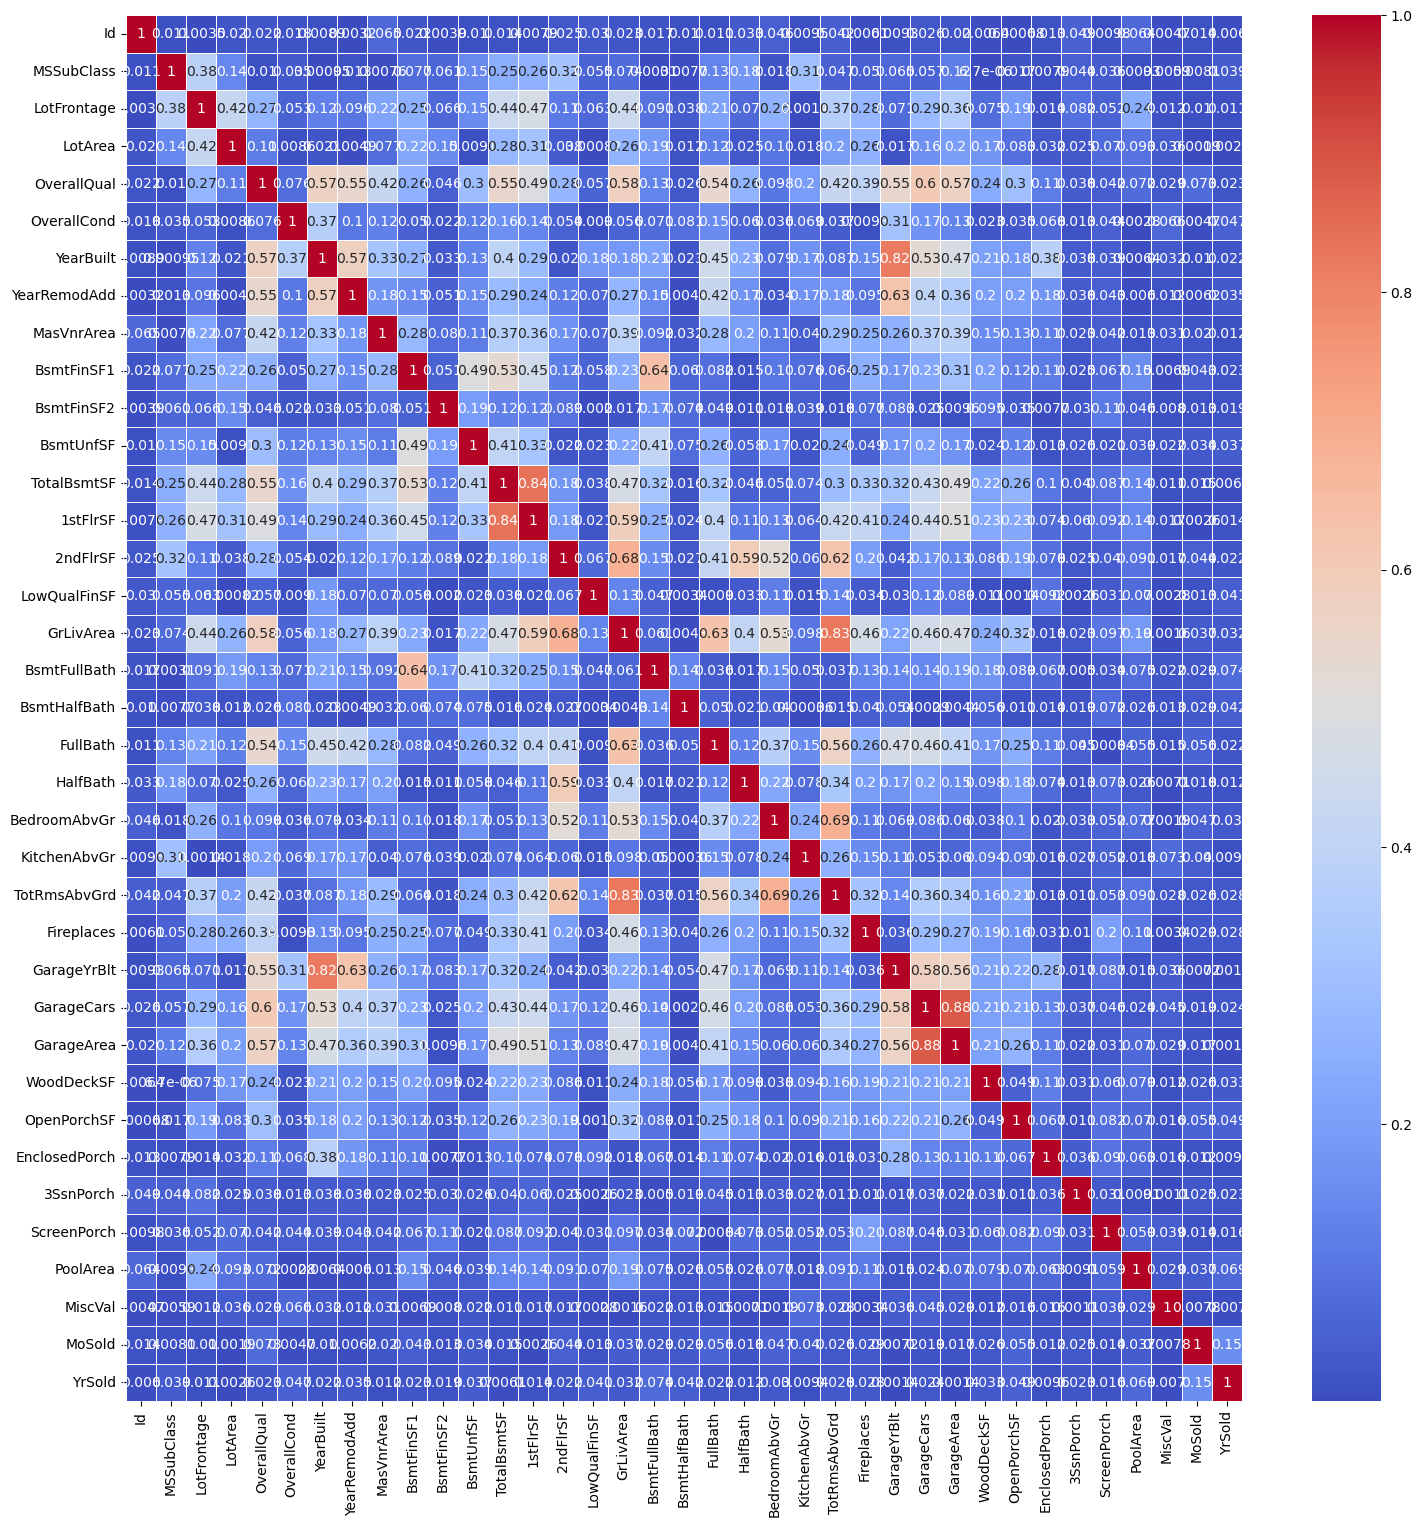

In [86]:
# Calculate the absolute correlation matrix for the feature matrix X_train_var2
corrMatrix = X_train_num.corr().abs()

# Set the size of the heatmap to be 18x18 inches
plt.figure(figsize=(18, 18))

# Create a heatmap using Seaborn (sns) to visualize the correlation matrix
# 'annot=True' adds the correlation values to the cells for better readability
# 'cmap='coolwarm'' specifies the color map to be used, with warm colors (red) for positive correlations
# and cool colors (blue) for negative correlations
# 'linewidths' sets the width of the white lines around the squares
sns.heatmap(corrMatrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5);

In [90]:
# Set the correlation threshold to consider columns as highly correlated
correlation_threshold = 0.88

# Initialise an empty list to store the pairs of highly correlated columns
highly_correlated_columns = []

# Get the number of features (columns) in the correlation matrix
num_features = len(corrMatrix.columns)

# Loop through the upper triangle of the correlation matrix to find highly correlated columns
# Note: We start from i+1 to avoid redundancy as correlation_matrix is symmetric
for i in range(num_features):
    for j in range(i + 1, num_features):
        # Check if the correlation value between columns i and j is greater than or equal to the threshold
        if corrMatrix.iloc[i, j] >= correlation_threshold:
            # Append the tuple (column_i, column_j) to the list of highly correlated columns
            highly_correlated_columns.append((corrMatrix.columns[i], corrMatrix.columns[j], f"correlation = {round(corrMatrix.iloc[i, j], 2)}"))

# Print the pairs of highly correlated columns
print("Highly correlated columns:", highly_correlated_columns)

Highly correlated columns: [('GarageCars', 'GarageArea', 'correlation = 0.88')]


In [97]:
to_drop = [element_a for element_a, element_b, element_c in highly_correlated_columns]
to_drop

['GarageCars']

In [121]:
# Drop the columns from the train set.
X_train_num_corr = X_train_num.drop(columns=to_drop).copy()
X_train_corr = pd.concat([X_train_cat, X_train_num_corr], axis=1)
# Drop the columns from the test set.
X_test_num_corr = X_test_num.drop(columns=to_drop).copy()
X_test_corr = pd.concat([X_test_cat, X_test_num_corr], axis=1)

In [122]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1168 entries, 318 to 1389
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1168 non-null   int64
dtypes: int64(1)
memory usage: 18.2 KB


In [124]:
preprocessor_corr = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_train_num_corr.columns),
        ("cat_pipe", categoric_pipe, X_train_cat.columns),
    ]
)

In [126]:
dt_pipeline_corr = make_pipeline(preprocessor_corr,
                                  StandardScaler(),
                            DecisionTreeRegressor())

dt_pipeline_corr.fit(X_train_corr, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea'...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [127]:
dt_predictions_corr = dt_pipeline_corr.predict(X_test_corr)

In [131]:
kn_pipeline_corr = make_pipeline(preprocessor_corr,
                            StandardScaler(),
                            KNeighborsRegressor())
kn_pipeline_corr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea'...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [132]:
kn_pipeline_corr.fit(X_train_corr, y_train)
kn_predictions_corr = kn_pipeline_corr.predict(X_test_corr)

In [136]:
sgd_pipeline_corr = make_pipeline(preprocessor_corr,
                            StandardScaler(),
                            SGDRegressor())
sgd_pipeline_corr.fit(X_train_corr, y_train)

sgd_predictions_corr = sgd_pipeline_corr.predict(X_test_corr)

In [138]:
lr_pipeline_corr = make_pipeline(preprocessor_corr,
                            StandardScaler(),
                            LinearRegression())
lr_pipeline_corr.fit(X_train_corr, y_train)

lr_predictions_corr = lr_pipeline_corr.predict(X_test_corr)

In [139]:
performance.loc["Collinearity", "decision_tree"] = r2_score(y_true = y_test,
                                                                 y_pred = dt_predictions_corr)
performance.loc["Collinearity", "KNeighborsRegressor"] = r2_score(y_true = y_test,
                                                                 y_pred = kn_predictions_corr)
performance.loc["Collinearity", "SGDRegressor"] = r2_score(y_true = y_test,
                                                                 y_pred = sgd_predictions_corr)
performance.loc["Collinearity", "LinearRegression"] = r2_score(y_true = y_test,
                                                                 y_pred = lr_predictions_corr)
performance

,decision_tree,SGDRegressor,LinearRegression,KNeighborsRegressor
varThreshold_0_002,0.692379,0.858378,-4.350631e+20,0.739784
Collinearity,0.702953,0.859546,-1.464868e+20,0.734032


---
## 6.&nbsp;Feature selection based on features and labels 🔧

### 6.1.&nbsp;K Best

Select K Best allows us to use statistical tests like ANOVA or chi2 to rank and select the best features. Refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) and [user guide](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) to see the model's methods, understand its parameters, and explore examples. If the documentation seems challenging, search for tutorials online.

We will have to choose an appropriate statistical test based on the data type: for our regression problem, an f-test will be used. Visit [Ben Lambert's Youtube channel](https://www.youtube.com/watch?v=ie-MYQp1Nic&ab_channel=BenLambert) for detailed explanations and examples on the f-test.

In short, Scikit-Learn computes the f-statistic for each univariate linear model (one for each feature). The f-statistic measures how much better the linear model with a single feature predicts compared to using only a constant value. This "score" allows us to rank the features.

For better understanding, let's run the statistical test and examine the f-statistics of each feature.

In [148]:
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [147]:
numeric_pipe.fit(X_train_num)
X_test_num_imputed = numeric_pipe.transform(X_test_num)
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 318 to 1389
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   LotFrontage    979 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   OverallQual    1168 non-null   int64  
 5   OverallCond    1168 non-null   int64  
 6   YearBuilt      1168 non-null   int64  
 7   YearRemodAdd   1168 non-null   int64  
 8   MasVnrArea     1164 non-null   float64
 9   BsmtFinSF1     1168 non-null   int64  
 10  BsmtFinSF2     1168 non-null   int64  
 11  BsmtUnfSF      1168 non-null   int64  
 12  TotalBsmtSF    1168 non-null   int64  
 13  1stFlrSF       1168 non-null   int64  
 14  2ndFlrSF       1168 non-null   int64  
 15  LowQualFinSF   1168 non-null   int64  
 16  GrLivArea      1168 non-null   int64  
 17  BsmtFullBath   1168 non-null   int64  
 18  BsmtHalfBat

In [145]:
# Run the univariate (= one feature at a time) linear regression tests.
f_stat, _ = f_regression(X_test_num_imputed, y_train)

# Create a DataFrame with the f-statistics and p-values.
f_test = pd.DataFrame({"f_stat":f_stat},
                      index=X_test_num_imputed.columns)

# Sort the values in the f-statistic column.
f_test.sort_values("f_stat", ascending=False)

ValueError: Found input variables with inconsistent numbers of samples: [292, 1168]

Above, we have a ranking of the "best" features based on their individual predictive ability in a linear model. The SelectKBest transformer performs this test and allows you to control the number of "top" features to retain using the K parameter. For our initial selection, we will set K=10, but feel free to adjust this value as needed.

> **Note:** In a pipeline with `GridSearchCV`, you can fine-tune the `K` parameter by trying out various possible values, along with other preprocessing and modeling parameters. Machine Learning often involves automated search or optimisation techniques to find the best parameter values, and it is normal not to have to intuitively know the ideal parameter values from the outset.

In [26]:
# Initialise KBest, using the f-regression and setting k=10.
KBest = SelectKBest(score_func=f_regression, k=10)

As always, after initialising the transformer we fit it to the train set and transform both the train and the test set:

In [27]:
# Transform the train set.
X_train_KBest = KBest.fit_transform(X_train, y_train).copy()

# Transform the test set.
X_test_KBest = KBest.transform(X_test).copy()

Now, you can see how both the train and the test set have only 10 features.

In [28]:
X_train_KBest.shape, X_test_KBest.shape

((800, 10), (200, 10))

Let's see how our models perform with these 10 "best" features:

In [29]:
# Decision tree.
k10_tree = DecisionTreeRegressor()
k10_tree.fit(X_train_KBest, y_train)
k10_tree_pred = k10_tree.predict(X_test_KBest)

# K-Nearest Neighbors.
k10_knn = KNeighborsRegressor(n_neighbors=1)
k10_knn.fit(X_train_KBest, y_train)
k10_knn_pred = k10_knn.predict(X_test_KBest)

performances.loc["KBest_10", "decision_tree"]= r2_score(y_test, k10_tree_pred)
performances.loc["KBest_10", "knn"] = r2_score(y_test, k10_knn_pred)

performances

,decision_tree,knn
baseline,0.810706,-1.010195
varThreshold_0_02,0.558548,0.180197
varThreshold_0_00,0.805991,0.338966
collinearity,0.806777,-0.980851
KBest_10,0.833500,0.606619


The performance of both models has increased significantly! It's possible it would increase even more by tuning the value of `K`.

### 6.2.&nbsp;Recursive Feature Elimination

Recursive Feature Elimination (RFE) is an automatic feature selection technique that efficiently identifies the most relevant features from a dataset. It begins by training a chosen model on all features and recording its performance. Then, it iteratively removes the least important features based on their importance rankings, continuously evaluating model performance. As long as the performance remains steady or improves, RFE keeps dropping features one by one. Once the performance starts to decline, it stops and saves the model, eliminating the need for manual or fine-tuning decisions on the number of features to keep.

However, it's essential to use a model capable of computing "feature importances" for RFE to be effective, and tree-based models are generally suitable for this purpose, unlike models like KNN. In scikit-learn, you can check if the model has an attribute called `feature_importances_`.

For more details, refer to the documentation and user guide here: [scikit-learn RFE documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). Before proceeding, let's explore the ranked list of features returned by RFE to gain a better understanding of their importance.

In [30]:
rfe_tree = RFECV(DecisionTreeRegressor())
rfe_tree.fit(X_train, y_train)
rfe_tree_pred = rfe_tree.predict(X_test)

performances.loc["RFE", "decision_tree"] = r2_score(y_test, rfe_tree_pred)

performances

,decision_tree,knn
baseline,0.810706,-1.010195
varThreshold_0_02,0.558548,0.180197
varThreshold_0_00,0.805991,0.338966
collinearity,0.806777,-0.980851
KBest_10,0.833500,0.606619
RFE,0.868629,NaN


Great news! The model's performance has increased once more!

To extract the names of the features selected by RFE, you can refer to the `rfe_tree` object.

In [31]:
rfe_tree.get_feature_names_out()

array(['feature_4', 'feature_16', 'feature_17'], dtype=object)

It appears that only three features were retained! Interestingly, these three features align with the top-ranking features from `SelectKBest`, which is reasonable since proper tuning of the `K` parameter could lead both methods to converge eventually. Nevertheless, this may not always be the case: RFE can detect valuable non-linear interactions between multiple features, as it checks how features work in combination with each other, while SelectKBest relies on univariate selection (checking features individually with the target).

> **Note:** When you encounter methods like `get_feature_names_out()` in pre-made notebooks, it might seem as if you needed to know them in advance. However, what's important is to be aware that Scikit-Learn transformer objects often store valuable information after being fitted. To access such information, always refer to the documentation for available attributes and methods, and search for what you need. In such a case, a simple search like "which features are selected in SelectKBest" would also yield helpful results.

### 6.3.&nbsp;Select from model

[SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html?highlight=selectfrommodel#sklearn.feature_selection.SelectFromModel) leverages the importance scores provided by a model to select the most relevant features from a given dataset. The process involves training a model on the entire feature set, obtaining the feature importances or coefficients from the model, and then selecting the features based on a specified threshold. If you don't include a threshold, SelectFromModel will automatically select the best features for you, using the model's inherent feature importance ranking. This approach is particularly useful for models that inherently provide feature importances, such as tree-based models or linear models, allowing us to focus on the most influential features and improve model performance while reducing complexity.
> **Note:** SelectFromModel may seem similar to RFE since both methods use inherent feature importance scores, but they operate differently. Unlike RFE, SelectFromModel solely concentrates on the top features based on their individual predictive power, without considering interactions between features.

In [32]:
select_model_tree = SelectFromModel(DecisionTreeRegressor(),
                                    threshold=None)

In [33]:
# Transform the train set.
X_train_selected_model_tree = select_model_tree.fit_transform(X_train, y_train)

# Transform the test set.
X_test_selected_model_tree = select_model_tree.transform(X_test)

In [34]:
# Show shape of the train and test dataset to check for the number of features kept.
print(X_train_selected_model_tree.shape, X_test_selected_model_tree.shape)

(800, 3) (200, 3)


Once again, only three features were retained. When different methods converge towards the same output, it instills confidence in the selection, indicating a robust choice.

In [35]:
select_model_tree.get_feature_names_out()

array(['feature_4', 'feature_16', 'feature_17'], dtype=object)

We can now try how both the Decision Tree and the KNN perform with these three features:

In [36]:
# Decision tree.
select_model_tree = DecisionTreeRegressor()
select_model_tree.fit(X_train_selected_model_tree, y_train)
select_model_tree_pred = select_model_tree.predict(X_test_selected_model_tree)

# K-Nearest Neighbors.
select_model_knn = KNeighborsRegressor(n_neighbors=1)
select_model_knn.fit(X_train_selected_model_tree, y_train)
select_model_knn_pred = select_model_knn.predict(X_test_selected_model_tree)

performances.loc["model_selected", "decision_tree"] = r2_score(y_test, select_model_tree_pred)
performances.loc["model_selected", "knn"] = r2_score(y_test, select_model_knn_pred)

performances

,decision_tree,knn
baseline,0.810706,-1.010195
varThreshold_0_02,0.558548,0.180197
varThreshold_0_00,0.805991,0.338966
collinearity,0.806777,-0.980851
KBest_10,0.833500,0.606619
RFE,0.868629,NaN
model_selected,0.877502,0.922235


Surprisingly, the KNN model has suddenly shown significant improvement with this combination of features! This serves as a valuable lesson on how algorithms can react differently to the same preprocessing and feature selection strategy. It highlights the importance of exploring various approaches to find the most suitable one for specific datasets and models.

---
## 7.&nbsp;Challenge 😃

Incorporate feature selection into your Housing Regression Pipeline. While you don't have to apply all the methods shown here, we suggest experimenting with 2-3 methods and ultimately choosing one. Research how to **integrate feature selection into your Scikit-Learn pipeline** and consider tuning it with GridSearchCV, which will enhance the cohesiveness of your ML workflow, though it's not mandatory. Happy experimenting!

In [ ]:
# good luck!